## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

## Reading the CSV file

In [7]:
df = pd.read_csv("features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## About the Dataset

In [9]:
df.shape

(9990, 60)

In [10]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [12]:
df = df.drop(labels = "filename", axis= 1)

## Understanding the Audio Files

In [13]:
audio_recordings = "genres_original/country/country.00050.wav"
data, sr = librosa.load(audio_recordings)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [15]:
librosa.load(audio_recordings, sr = 45600)

(array([ 0.04563559,  0.06239938,  0.05848034, ..., -0.13778664,
        -0.11675889, -0.05944651], dtype=float32),
 45600)

In [17]:
import librosa.display

## Plotting raw wave files

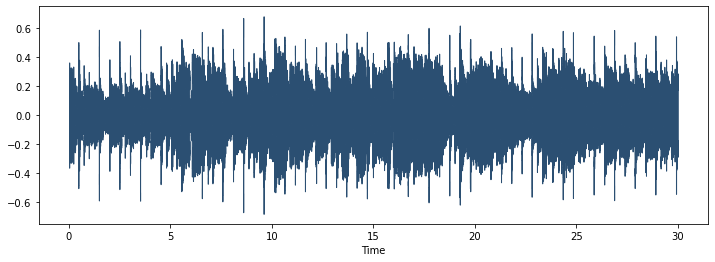

In [19]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, color = "#2B4F72")
plt.show()

## Spectrograms

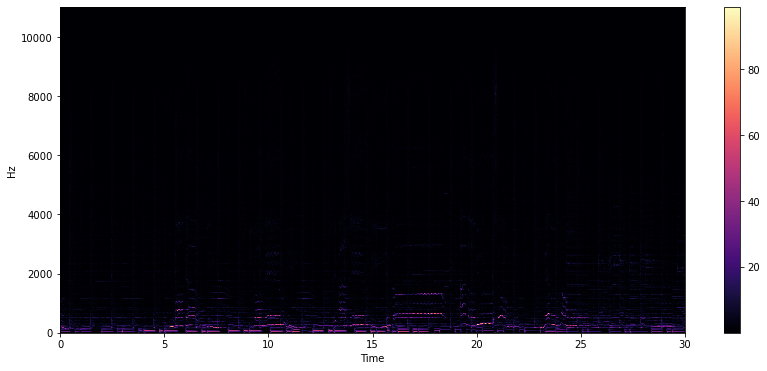

In [24]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (14, 6))
librosa.display.specshow(stft, sr=sr, x_axis = "time", y_axis = "hz")
plt.colorbar()


<ipython-input-25-8eaa1c65bef4>:2: FutureWarning: Pass y=[ 0.05617309  0.06691528  0.01158691 ... -0.04786133 -0.09861206
 -0.11380982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


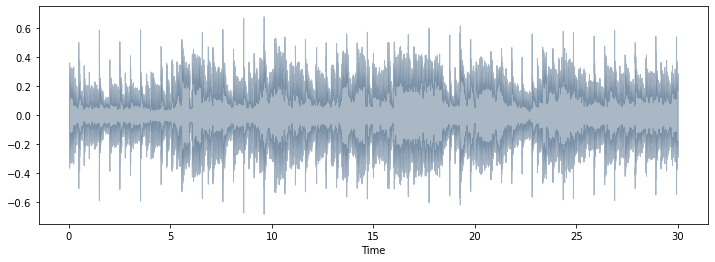

In [25]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#2B4F72")

## Chroma Feature

<ipython-input-26-d227fd68740b>:2: FutureWarning: Pass y=[ 0.0461731   0.05691528  0.00158691 ... -0.05786133 -0.10861206
 -0.12380981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


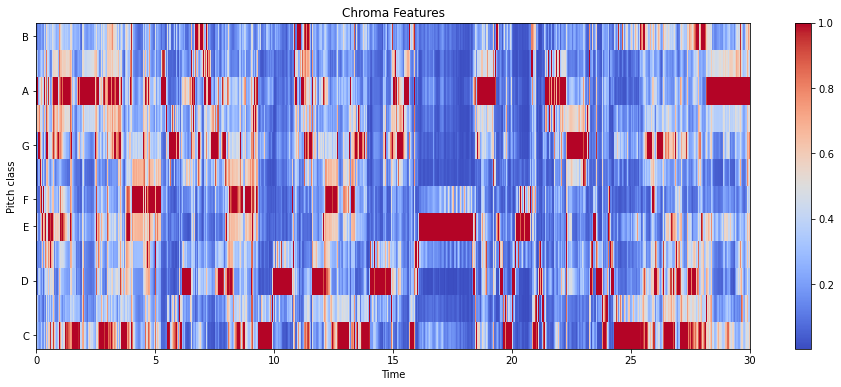

In [26]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16, 6))
lplt.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", cmap = "coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

## Zero Crossing Rate

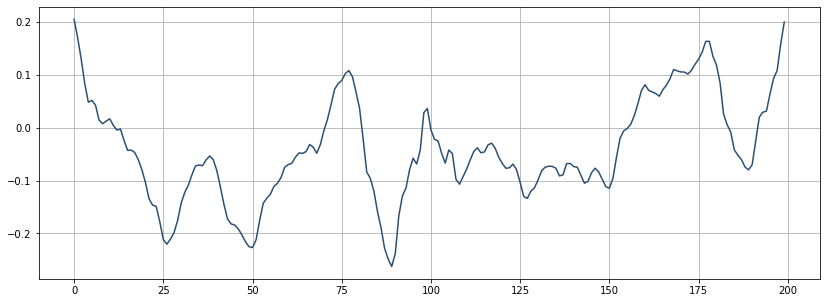

In [28]:
start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color = "#2B4F72")
plt.grid()

In [29]:
zero_crossing_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero-crossings is :", sum(zero_crossing_rate))


The number of zero-crossings is : 8


## Feature Extraction

In [35]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [36]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [37]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

## Scaling the features

In [39]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

## Dividing Data Into Training and Testing Sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)


In [45]:
len(y_train)

6693

In [46]:
len(y_test)

3297

## Building the Model using CNN 

In [62]:
from keras.models import Sequential


In [69]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    #callback = myCallback()
    model.compile(optimizer=optimizer, 
                  loss = "sparse_categorical_crossentropy",
                 metrics = "accuracy")
    return model.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs,batch_size=batch_size)

In [70]:
def plotValidate(history):
    print("Validation Accuracy", 
          max(history.history['val_accuracy']))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()


In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, 
                    activation='relu', 
                    input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation="softmax"),
])

print(model.summary())
model_history = trainModel(model=model, epochs=600, optimizer="adam")


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               30208     
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)               

53/53 [==============================] - 0s 6ms/step - loss: 0.0813 - accuracy: 0.9749 - val_loss: 0.3356 - val_accuracy: 0.9126
Epoch 48/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0613 - accuracy: 0.9797 - val_loss: 0.3617 - val_accuracy: 0.9120
Epoch 49/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0725 - accuracy: 0.9801 - val_loss: 0.3335 - val_accuracy: 0.9148
Epoch 50/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9834 - val_loss: 0.3494 - val_accuracy: 0.9145
Epoch 51/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0652 - accuracy: 0.9779 - val_loss: 0.3297 - val_accuracy: 0.9181
Epoch 52/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0637 - accuracy: 0.9800 - val_loss: 0.3554 - val_accuracy: 0.9081
Epoch 53/600
53/53 [==============================] - 0s 5ms/step - loss: 0.0525 - accuracy: 0.9819 - val_loss: 0.3490 - val_accuracy: 0.9105
Epoch 54/600
53/53 

Epoch 105/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.3732 - val_accuracy: 0.9181
Epoch 106/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.3734 - val_accuracy: 0.9217
Epoch 107/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.9900 - val_loss: 0.4073 - val_accuracy: 0.9151
Epoch 108/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.3989 - val_accuracy: 0.9151
Epoch 109/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.4052 - val_accuracy: 0.9145
Epoch 110/600
53/53 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.9889 - val_loss: 0.3775 - val_accuracy: 0.9142
Epoch 111/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.3768 - val_accuracy: 0.9178

53/53 [==============================] - 0s 6ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.4117 - val_accuracy: 0.9211
Epoch 163/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.3778 - val_accuracy: 0.9251
Epoch 164/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.3687 - val_accuracy: 0.9260
Epoch 165/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.3862 - val_accuracy: 0.9175
Epoch 166/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0274 - accuracy: 0.9925 - val_loss: 0.4064 - val_accuracy: 0.9184
Epoch 167/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.4396 - val_accuracy: 0.9154
Epoch 168/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.4449 - val_accuracy: 0.9120
Epoch 169/600

53/53 [==============================] - 0s 6ms/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.4099 - val_accuracy: 0.9263
Epoch 220/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.4345 - val_accuracy: 0.9251
Epoch 221/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0222 - accuracy: 0.9937 - val_loss: 0.4213 - val_accuracy: 0.9221
Epoch 222/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 0.9946 - val_loss: 0.3945 - val_accuracy: 0.9272
Epoch 223/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.3847 - val_accuracy: 0.9272
Epoch 224/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.4259 - val_accuracy: 0.9208
Epoch 225/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.3994 - val_accuracy: 0.9260
Epoch 226/600

53/53 [==============================] - 0s 7ms/step - loss: 0.0204 - accuracy: 0.9945 - val_loss: 0.4667 - val_accuracy: 0.9221
Epoch 277/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.4417 - val_accuracy: 0.9260
Epoch 278/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.4217 - val_accuracy: 0.9245
Epoch 279/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.4417 - val_accuracy: 0.9224
Epoch 280/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0215 - accuracy: 0.9937 - val_loss: 0.4537 - val_accuracy: 0.9248
Epoch 281/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.4185 - val_accuracy: 0.9217
Epoch 282/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.4096 - val_accuracy: 0.9211
Epoch 283/600

53/53 [==============================] - 0s 6ms/step - loss: 0.0203 - accuracy: 0.9949 - val_loss: 0.4117 - val_accuracy: 0.9293
Epoch 334/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.4058 - val_accuracy: 0.9284
Epoch 335/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.3956 - val_accuracy: 0.9302
Epoch 336/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.4046 - val_accuracy: 0.9308
Epoch 337/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0155 - accuracy: 0.9957 - val_loss: 0.3964 - val_accuracy: 0.9287
Epoch 338/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.4218 - val_accuracy: 0.9248
Epoch 339/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.4084 - val_accuracy: 0.9287
Epoch 340/600

53/53 [==============================] - 0s 6ms/step - loss: 0.0224 - accuracy: 0.9945 - val_loss: 0.4147 - val_accuracy: 0.9287
Epoch 391/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 0.9951 - val_loss: 0.4471 - val_accuracy: 0.9251
Epoch 392/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.4398 - val_accuracy: 0.9272
Epoch 393/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9961 - val_loss: 0.4034 - val_accuracy: 0.9318
Epoch 394/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.4608 - val_accuracy: 0.9284
Epoch 395/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 0.4531 - val_accuracy: 0.9293
Epoch 396/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.4376 - val_accuracy: 0.9308
Epoch 397/600

53/53 [==============================] - 0s 6ms/step - loss: 0.0163 - accuracy: 0.9940 - val_loss: 0.4860 - val_accuracy: 0.9239
Epoch 448/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9958 - val_loss: 0.4915 - val_accuracy: 0.9257
Epoch 449/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.5087 - val_accuracy: 0.9224
Epoch 450/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.4782 - val_accuracy: 0.9260
Epoch 451/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.9970 - val_loss: 0.4993 - val_accuracy: 0.9266
Epoch 452/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.4757 - val_accuracy: 0.9260
Epoch 453/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.4789 - val_accuracy: 0.9211
Epoch 454/600

53/53 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.9957 - val_loss: 0.4321 - val_accuracy: 0.9305
Epoch 505/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.4466 - val_accuracy: 0.9287
Epoch 506/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.4347 - val_accuracy: 0.9275
Epoch 507/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.4337 - val_accuracy: 0.9351
Epoch 508/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.9966 - val_loss: 0.4531 - val_accuracy: 0.9315
Epoch 509/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.4685 - val_accuracy: 0.9278
Epoch 510/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.4428 - val_accuracy: 0.9348
Epoch 511/600

53/53 [==============================] - 0s 6ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.4807 - val_accuracy: 0.9260
Epoch 562/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.5183 - val_accuracy: 0.9254
Epoch 563/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.5099 - val_accuracy: 0.9266
Epoch 564/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.4329 - val_accuracy: 0.9321
Epoch 565/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.9957 - val_loss: 0.4826 - val_accuracy: 0.9290
Epoch 566/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.4487 - val_accuracy: 0.9324
Epoch 567/600
53/53 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.9973 - val_loss: 0.4601 - val_accuracy: 0.9354
Epoch 568/600

## Model Evaluation

In [72]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size = 128)
print("The test Loss is : ", test_loss)
print("\nThe Best test Accuracy is : ", test_acc*100)


26/26 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.9266
The test Loss is :  0.5285523533821106

The Best test Accuracy is :  92.659991979599
